In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Alternatives'), 60, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-13 to 2019-07-12 - 12


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

12


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
XLRE,38,0.649579,2.045415,0.298178,5.008092,4.835459
ICF,38,0.571603,2.056049,0.258710,4.635666,4.991450
VNQI,38,0.556804,0.971778,0.532140,5.768892,1.474619
VNQ,38,0.519682,2.040756,0.235207,4.091672,5.135487
IYR,38,0.517751,2.034751,0.234952,4.252262,4.963136
REET,38,0.461817,1.547587,0.272770,4.140717,3.361345
RWO,38,0.442403,1.453253,0.277117,3.773346,3.132428
RWX,38,0.436898,0.940543,0.422326,3.914037,1.438101
USRT,38,0.430658,2.091996,0.186891,3.418335,5.198662


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


evicted REM 0.490 0.456
evicted VNQI 0.526 0.526
retry backlogs ['RWR', 'REET', 'USRT', 'VNQ', 'SCHH', 'IYR', 'RWO', 'RWX', 'ICF'] at 0.905/-0.51 - 0.298
evicted RWX 0.636 0.636
retry backlogs ['RWR', 'USRT', 'SCHH', 'IYR', 'VNQ', 'REET', 'RWO', 'ICF'] at 0.910/-0.52 - 0.298
retry backlogs ['SCHH', 'IYR', 'USRT', 'RWR', 'VNQ', 'ICF', 'REET', 'RWO'] at 0.915/-0.53 - 0.298
retry backlogs ['SCHH', 'IYR', 'USRT', 'RWR', 'VNQ', 'ICF', 'REET', 'RWO'] at 0.920/-0.54 - 0.298
retry backlogs ['SCHH', 'IYR', 'USRT', 'RWR', 'VNQ', 'ICF', 'REET', 'RWO'] at 0.925/-0.55 - 0.298
retry backlogs ['SCHH', 'IYR', 'USRT', 'RWR', 'VNQ', 'ICF', 'REET', 'RWO'] at 0.930/-0.56 - 0.298
retry backlogs ['SCHH', 'IYR', 'USRT', 'RWR', 'VNQ', 'ICF', 'REET', 'RWO'] at 0.935/-0.57 - 0.298
retry backlogs ['SCHH', 'IYR', 'USRT', 'RWR', 'VNQ', 'ICF', 'REET', 'RWO'] at 0.940/-0.58 - 0.298
evicted RWO 0.939 0.939
retry backlogs ['SCHH', 'IYR', 'USRT', 'RWR', 'VNQ', 'ICF', 'REET'] at 0.945/-0.59 - 0.298
retry backlogs ['RWR'

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
XLRE,38.0,0.649579,2.045415,-4.263532,-0.39191,0.697544,2.321947,4.319119,0.298178,5.008092,4.835459
Portfolio,38.0,0.649579,2.045415,-4.263532,-0.39191,0.697544,2.321947,4.319119,0.298178,5.008092,4.835459


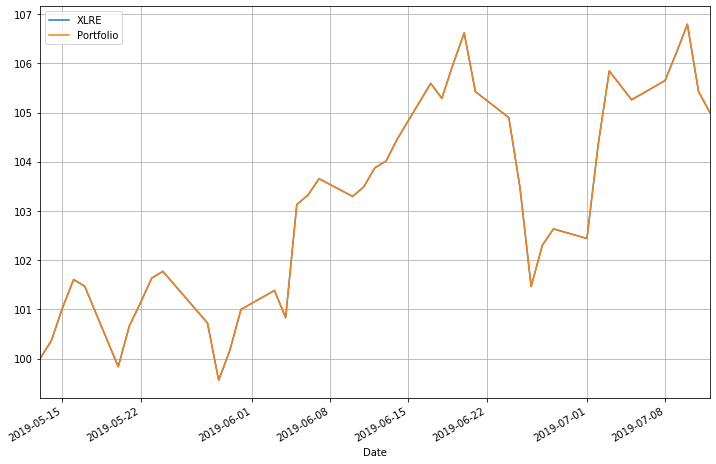

In [5]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(_lambda=2)
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=2))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)